<a href="https://colab.research.google.com/github/skrofman/Applied-Machine-Learning/blob/master/DATA_310_Lecture_16_Spring_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA 310 Lecture 16 - Spring 2021

##<font color= 'navy'> Model Validation via k-Fold Cross-Validations</font>

<font color='red'> In reality only one train and test split is not good enough for an unbiased estimation of the MSE </font>

In order to compare the predictive power of different models we use K-fold cross-validation.

Example schematic of a 5-fold cross-validation:

<figure>
<center>
<img src='https://drive.google.com/uc?id=1AMSDtgJ-ADYjWFbHCdumvIGqUsmKSzdW' 
width='550px' />
<figcaption>Step 1 in the 5-fold cross-validation</figcaption></center>
</figure>



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn import linear_model
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error as MSE

In [ ]:
from sklearn.metrics import mean_squared_error as MSE
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
scale = StandardScaler()

In [ ]:
from sklearn.model_selection import KFold # import KFold
kf = KFold(n_splits=5, random_state=1234,shuffle=True) # Define the split - into n_splits=.. folds 

In [ ]:
model = LinearRegression()

In [ ]:
polynomial_features= PolynomialFeatures(degree=10)

In [ ]:
np.random.seed(1693)
x = 2 - 3 * np.random.normal(0, 1, 100)

# this was the ground truth
def f(x):
    sz = len(x)
    return x - 2.5 * (x ** 2) + .25 * (x ** 3) + 2 * np.random.normal(-3, 3, sz)

y = f(x)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=2021)
x_poly_train = polynomial_features.fit_transform(np.array(x_train).reshape(-1,1))
x_poly_test = polynomial_features.fit_transform(np.array(x_test).reshape(-1,1))
model.fit(x_poly_train,y_train)
yhat_train = model.predict(x_poly_train)
yhat_test = model.predict(x_poly_test)
print('The MSE for the Train data is : '+str(mean_squared_error(y_train,yhat_train)))
print('The MSE for the Test data is : '+str(mean_squared_error(y_test,yhat_test)))

The MSE for the Train data is : 35.14042668997389
The MSE for the Test data is : 61.55449475086166


In [ ]:
MSE_train = []
MSE_test = []
for idxtrain, idxtest in kf.split(x):
  x_train = x[idxtrain]
  x_test = x[idxtest]
  y_train = y[idxtrain]
  y_test  = y[idxtest]
  x_poly_train = polynomial_features.fit_transform(np.array(x_train).reshape(-1,1))
  x_poly_test = polynomial_features.fit_transform(np.array(x_test).reshape(-1,1))
  model.fit(x_poly_train,y_train)
  yhat_train = model.predict(x_poly_train)
  yhat_test = model.predict(x_poly_test)
  MSE_train.append(mean_squared_error(y_train,yhat_train))
  MSE_test.append(mean_squared_error(y_test,yhat_test))

In [ ]:
np.mean(MSE_train)

37.397643813917355

In [ ]:
np.mean(MSE_test)

73.27859733654529

In [ ]:
columns = 'age sex bmi map tc ldl hdl tch ltg glu'.split() # Declare the columns names
diabetes = datasets.load_diabetes() # Call the diabetes dataset from sklearn
df = pd.DataFrame(diabetes.data, columns=columns) # load the dataset as a pandas data frame
y = diabetes.target # define the target variable (dependent variable) as y

In [ ]:
i = 0
PE = []

for train_index, test_index in kf.split(df):
    X_train = df.values[train_index]
    y_train = y[train_index]
    X_test = df.values[test_index]
    y_test = y[test_index]
    model = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    PE.append(np.sqrt(MSE(y_test, y_pred)))
    print('Score:',np.sqrt(MSE(y_test, y_pred)))

np.mean(PE)

Score: 2.07564232825625e-14
Score: 2.53339911070645e-14
Score: 3.5649374396225664e-14
Score: 3.6946700750042225e-14
Score: 4.55244490049349e-14


3.2842187708165956e-14

In [ ]:
scale = StandardScaler()
lm = LinearRegression()

In [ ]:
pipe = Pipeline([('scale',scale),('lm',model)])

In [ ]:
pipe.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lm',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [ ]:
pipe.predict(X_test)

array([61.89, 41.05, 44.3 , 38.07, 47.81, 52.91, 40.56, 41.15, 55.26,
       43.7 , 35.08, 15.05, 40.86, 37.8 , 40.2 , 25.2 , 41.1 , 28.3 ,
       35.3 , 55.6 , 49.2 , 61.09, 59.8 , 61.8 , 56.7 , 74.7 , 66.  ,
       74.5 , 63.4 , 64.9 , 66.1 , 71.7 , 65.2 , 67.8 , 24.99, 25.72,
       33.96, 39.61, 24.48, 31.54, 53.9 , 17.84, 40.23, 40.86, 19.93,
       30.23, 24.92, 31.64, 42.55, 42.92, 29.93, 13.12, 13.62, 27.77,
       31.27, 43.5 , 48.67, 48.97, 39.94, 52.04, 44.14, 45.37, 42.29,
       60.32, 23.8 , 51.33, 36.99, 56.74, 33.73, 40.15, 30.45, 38.6 ,
       30.22, 37.27, 16.28, 36.3 , 78.8 , 41.37, 67.87, 12.18, 32.9 ,
       20.73, 39.16, 33.69, 37.81, 24.85, 44.64, 51.72, 51.26, 55.02,
       50.94, 44.28, 57.03, 25.02, 56.14, 34.77, 41.67, 44.03, 61.86,
       72.1 , 39.  , 74.36, 13.4 , 35.75, 38.61, 24.4 , 31.97, 39.44,
       33.08, 24.07, 38.7 ,  7.51, 19.77, 11.48, 10.73, 31.38, 27.04,
       32.04, 21.95,  9.31, 27.63, 32.92,  9.99, 14.2 , 38.21, 30.14,
       20.59, 27.87,

##<font color='navy'> Support Vector Regression </font>

Support Vectors is a method used in Machine Learning for both regression and classification problmes. The main idea is to map the input features into a higher dimensional space and then, in that higher dimensional space, address the problem to solve. 

For regression, SVM consists of an algorithm that solves a quadratic optimization problem with constraints:

$$
\text{minimize}\frac{1}{2}\|w\|^2
$$

subject to 

$$
y_i -wx_i - b\leq\epsilon\\
wx_i+b-y_i \leq \epsilon
$$

Intuitively we have

<figure>
<center>
<img src='https://drive.google.com/uc?id=181CQwT0LE0UnbBspZyce_4sSr6Qbcx38' 
width='500px' />
<figcaption>Support Vector Regression</figcaption></center>
</figure>


In [ ]:
regSVM = LinearSVR(epsilon=1.0, tol=1e-8,max_iter=1000000)

In [ ]:
from sklearn.model_selection import KFold # import KFold
kf = KFold(n_splits=10, random_state=2020,shuffle=True)

In [ ]:
data = load_boston()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
y = data.target

In [ ]:
df.head(10)

In [ ]:
i = 0
PE = []
lm = linear_model.LinearRegression()
for train_index, test_index in kf.split(df):
    X_train = df.values[train_index]
    y_train = y[train_index]
    X_test = df.values[test_index]
    y_test = y[test_index]
    model = lm.fit(X_train, y_train)
    y_pred = lm.predict(X_test)
    PE.append(np.sqrt(MSE(y_test, y_pred)))
    # print('RMSE from each fold:',np.sqrt(MSE(y_test, y_pred)))

print('The k-fold crossvalidated prediction error is: ' + str(np.mean(PE)))

The k-fold crossvalidated prediction error is: 4.7812545174140775


In [ ]:
i = 0
PE = []
regSVM = LinearSVR(epsilon=5.0,max_iter= 10000)
for train_index, test_index in kf.split(df):
    X_train = df.values[train_index]
    y_train = y[train_index]
    X_test = df.values[test_index]
    y_test = y[test_index]
    model = regSVM.fit(X_train, y_train)
    y_pred = regSVM.predict(X_test)
    PE.append(np.sqrt(MSE(y_test, y_pred)))
    # print('RMSE from each fold:',np.sqrt(MSE(y_test, y_pred)))

print('The k-fold crossvalidated prediction error is: ' + str(np.mean(PE)))

Make a cross-validated comparison between SVR, OLS, Lasso and RIDGE regression.

##<font color='navy'> Regression Trees</font>

<font color='green'> **Main Idea:** Things are different for subsets in the data. Nonlinear relationships may exist and we should be able to accommodate them.
</font>

\

**Example:** Predict the price of a car by using a (possibly nonlinear) combination of features such as wheelbase and horsepower.

<figure>
<center>
<img src='https://drive.google.com/uc?id=1yVm5Xa9WVZViJjaA9w35veKGGK3ggqGU' 
width='500px' />
<figcaption>Data for a Decision Tree</figcaption></center>
</figure>

And we can create a **regression tree**:

<figure>
<center>
<img src='https://drive.google.com/uc?id=1Pm0nKc2DCw7Cx4gSGX_fDPKCU2w5mmkM' 
width='400px' />
<figcaption>The actual Decision Tree</figcaption></center>
</figure>

<figure>
<center>
<img src='https://drive.google.com/uc?id=1WXNaLZMFe5vV2sE6NO6QgXUWQ10kSHjW' 
width='350px' />
<figcaption>Visual interpretation</figcaption></center>
</figure>

<font color="green">**Stopping Criteria:** Stop growing the tree when further splits gives less than some minimal amount of extra information or when we have less than 5% of the data in those nodes.</font>


1. Start with a single node containing all the points then calculate $m_c$ and $S.$ We have $$S:=\sum\limits_{C\in\text{leaves(T)}}\sum\limits_{i\in C}(y_i-m_c)^2$$ and $$m_c:=\frac{1}{n_c}\sum\limits_{i\in C}y_i.$$
2. If all the points in the node have the same value for all the independent variables, stop. Otherwise, search over all binary splits of all variables for the one which will reduce $S$ as much as possible. If the largest decrease in $S$ would be less than some threshold $\delta$, or one of the resulting nodes would contain less than $q$ points, stop. Otherwise take that split, creating two new nodes.
3. In each new node go back to Step 1.


##<font color='navy'> Example of Regression Tree in Python</font>

In this example we have one input feature and one dependent variable.

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120

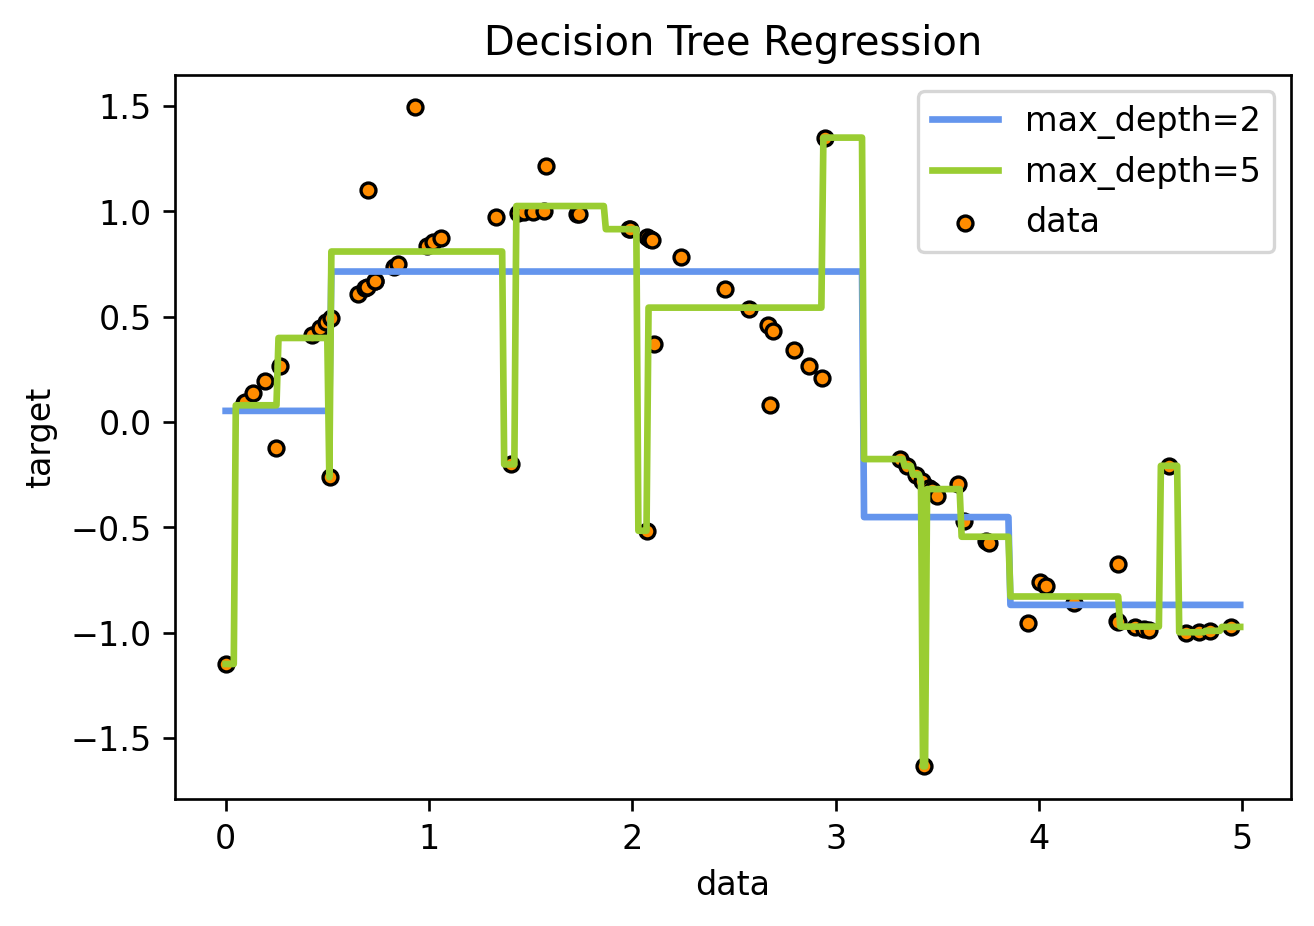

In [ ]:
# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

##<font color="navy"> Ensemble Learning - Random Forests</font>

- Step 1: Pick a random set of points from your training set.

- Step 2: Build the regression tree.

- Step 3: Build thousands of trees, repeating 1 and 2.

- Step 4: For every unit of observation, take the average prediction across all trees.

<font color='green'>**Rationale**: more resilient to outliers, better for external validity. You can also provide information on how certain or uncertain you are about a result.
</font>

- Question: How many trees should we grow in the forest?
Answer: Don’t want your answer changing much. There is no good pre-determined number.

- “Convergence” -when adding another ten trees (or, whatever number) doesn’t matter to your results. Depends heavily on the structure and complication of your study.

Generally speaking, "let it grow" (Leo Breiman)